In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [518]:
df = pd.read_csv('train.csv')
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [520]:
df.shape

(37500, 19)

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [522]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [523]:
df['review/timeStruct'].unique()

array(["{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, 'year': 2008, 'wday': 1, 'mon': 12, 'isdst': 0, 'yday': 351}",
       "{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, 'year': 2008, 'wday': 4, 'mon': 8, 'isdst': 0, 'yday': 221}",
       "{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, 'year': 2004, 'wday': 4, 'mon': 11, 'isdst': 0, 'yday': 331}",
       ...,
       "{'min': 3, 'hour': 1, 'mday': 25, 'sec': 36, 'year': 2003, 'wday': 5, 'mon': 10, 'isdst': 0, 'yday': 298}",
       "{'min': 52, 'hour': 19, 'mday': 29, 'sec': 33, 'year': 2011, 'wday': 5, 'mon': 1, 'isdst': 0, 'yday': 29}",
       "{'min': 40, 'hour': 18, 'mday': 4, 'sec': 28, 'year': 2009, 'wday': 4, 'mon': 9, 'isdst': 0, 'yday': 247}"],
      dtype=object)

In [524]:
degit_column = df.select_dtypes(include = ['int64', 'float64']).columns
degit_column

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId',
       'review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste', 'review/timeUnix', 'user/ageInSeconds',
       'user/birthdayUnix'],
      dtype='object')

In [411]:
for col in degit_column:
    print(f'{col} - {df[col].nunique()}')

index - 37500
beer/ABV - 126
beer/beerId - 1731
beer/brewerId - 212
review/appearance - 10
review/aroma - 9
review/overall - 10
review/palate - 9
review/taste - 9
review/timeUnix - 37490
user/ageInSeconds - 1471
user/birthdayUnix - 1432


In [525]:
column_catecory = df.select_dtypes('object').columns
column_catecory

Index(['beer/name', 'beer/style', 'review/text', 'review/timeStruct',
       'user/birthdayRaw', 'user/gender', 'user/profileName'],
      dtype='object')

In [526]:
for column in column_catecory:
        print(f'{column} - {df[column].nunique()}')

beer/name - 1688
beer/style - 95
review/text - 37482
review/timeStruct - 37490
user/birthdayRaw - 1432
user/gender - 2
user/profileName - 7441


Визуализация крепости пива

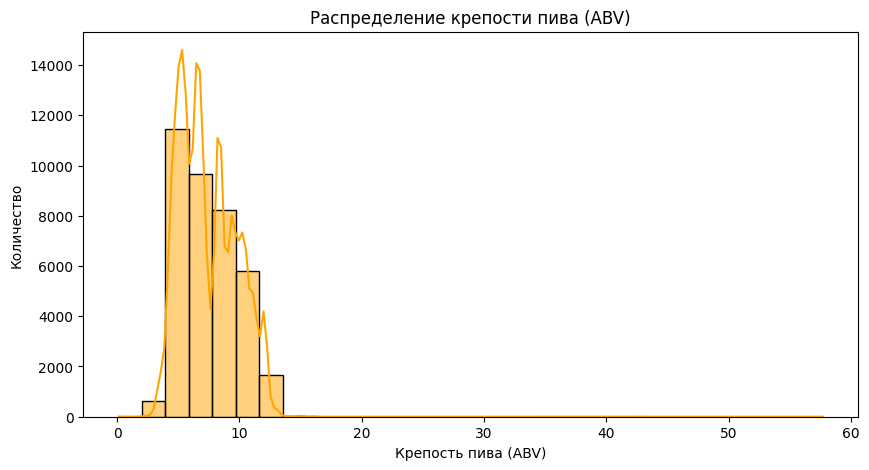

In [527]:
plt.figure(figsize=(10, 5))
sns.histplot(df["beer/ABV"], bins=30, kde=True, color="orange")
plt.xlabel("Крепость пива (ABV)")
plt.ylabel("Количество")
plt.title("Распределение крепости пива (ABV)")
plt.show()

In [528]:
df[df['beer/ABV']>20]

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
6436,12020,39.44,55712,6513,SchorschbrÃ¤u Schorschbock 40%,Eisbock,3.5,3.5,3.0,3.5,3.5,Very lucky to get a 2oz sample of this at a ta...,"{'min': 8, 'hour': 20, 'mday': 23, 'sec': 14, ...",1274645294,1.200406e+09,"Nov 27, 1976",217929600.0,Male,thepeter
22617,12018,43.00,57856,6513,SchorschbrÃ¤u Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,4.5,"The bottle looks really great, handnumbered an...","{'min': 23, 'hour': 19, 'mday': 21, 'sec': 18,...",1274469798,NaN,NaN,NaN,NaN,kappldav123
25416,12017,43.00,57856,6513,SchorschbrÃ¤u Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,4.0,43% ABV - this is so crazy!\t\tA: Pour is warm...,"{'min': 42, 'hour': 17, 'mday': 6, 'sec': 58, ...",1309974178,NaN,NaN,NaN,NaN,Sunnanek
33166,11997,57.70,73368,6513,SchorschbrÃ¤u Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,3.5,"New world strongest beer. Very limited, only 3...","{'min': 28, 'hour': 12, 'mday': 23, 'sec': 21,...",1316780901,NaN,NaN,NaN,NaN,kappldav123
36202,11996,30.86,51466,6513,SchorschbrÃ¤u Schorschbock 31%,Eisbock,4.0,4.0,3.5,4.0,4.5,Bottle @ home (of course not the whole bottle ...,"{'min': 58, 'hour': 12, 'mday': 28, 'sec': 56,...",1248785936,NaN,NaN,NaN,NaN,kappldav123


Корреляционная матрица

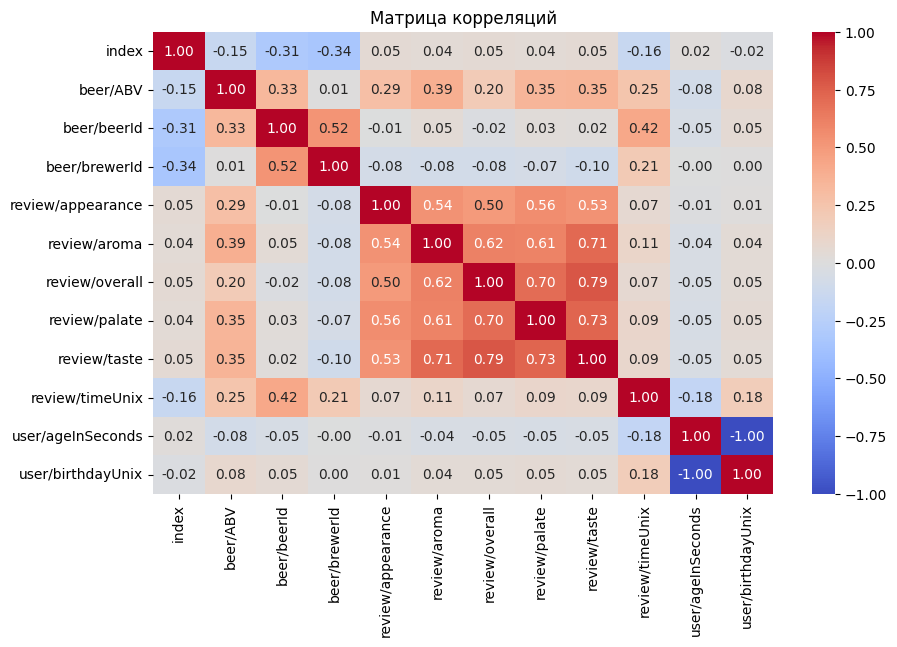

In [529]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Матрица корреляций")
plt.show()

10 самых популярных видов пива

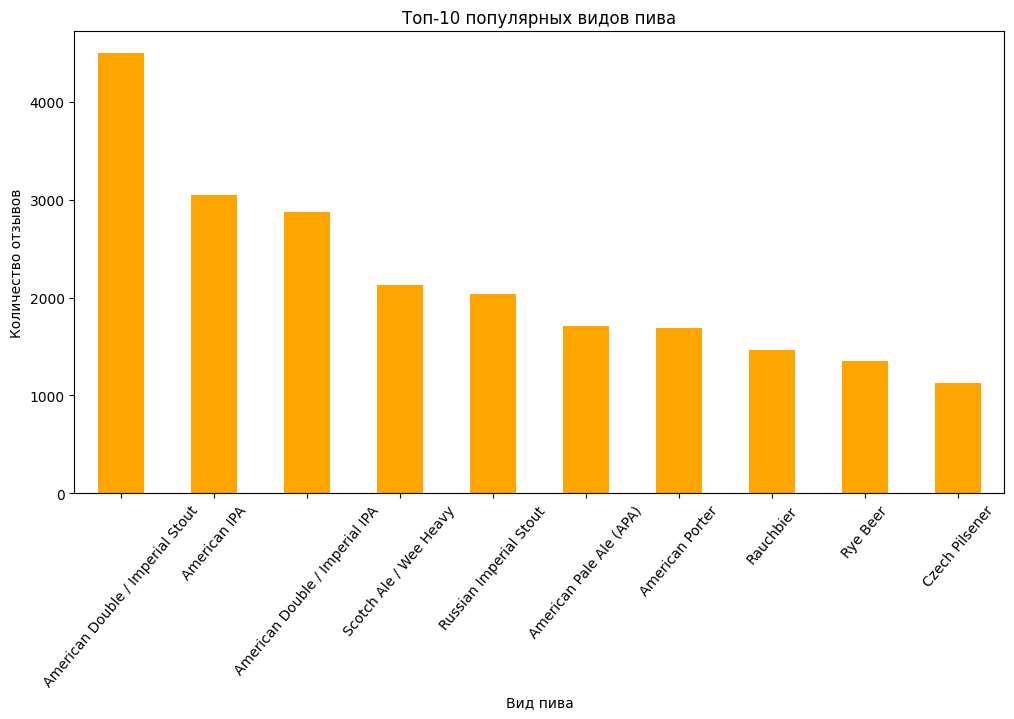

In [530]:
plt.figure(figsize=(12, 6))
df["beer/style"].value_counts().head(10).plot(kind="bar", color="orange")
plt.xlabel("Вид пива")
plt.ylabel("Количество отзывов")
plt.title("Топ-10 популярных видов пива")
plt.xticks(rotation=50)
plt.show()


Вопрос 1
1) Проанализировать данные, которые вам попались. Какие выводы можно сделать только из анализа? Проведите визуальный и статический анализ, опишите ваши находки.

Ответ на 1 вопрос
1) Большинство сортов пива имеет крепость в диапазоне 4–10%, что типично для большинства видов.
2) Оценки (review/appearance, review/aroma, review/overall, review/palate, review/taste) сильно коррелируют друг с другом, так как пользователи оценивают вкусовые качества схожим образом.
У крепости пива есть небольшая связь с ароматом и вкусом, что может говорить о том, что более крепкое пиво чаще получает хорошие оценки за вкус и аромат.
user/ageInSeconds и user/birthdayUnix имеют корреляцию (-1.00), так как возраст рассчитывается из даты рождения, поэтому они находятся в обратной зависимости.
3) Самые популярные виды: Imperial Stout, American IPA, Double IPA, так как они получили наибольшее количество отзывов.

Вопрос 2 и 3.

2) Определите, какое моделирование доступно для ваших данных. Какие есть в них связи?
3) Опишите возможные верхнеуровневые задачи, которые можно решать с помощью таких данных.

Ответ на вопросы 2 и 3
1) Классификация: предсказание вида пива на основе характеристик.
С помощью этого можно рекомендовать пользователям новые сорта пива на основе их предпочтений; автоматически классифицировать новые сорта пива, помогая пивоварам и торговым площадкам.
2) Регрессия: предсказание итоговой оценки по остальным параметрам.
С помощью этого можно определить, какие характеристики пива наиболее влияют на его популярность; анализировать качество продукции разных пивоварен и выявлять закономерности.
3) Анализ текста: предсказание тональности отзыва на основе review/text.
С помощью этого можно автоматически выявлять негативные отзывы, чтобы помочь пивоварам и магазинам улучшить свою продукцию; понять предпочтения клиентов и выявить, какие характеристики пива вызывают больше положительных или отрицательных эмоций; оптимизировать описания товаров на основе наиболее часто встречающихся слов в положительных отзывах.

In [531]:
mis = df.isnull().sum()
mis

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [532]:
mis_percent = mis/len(df)*100
mis_percent

index                 0.000000
beer/ABV              0.000000
beer/beerId           0.000000
beer/brewerId         0.000000
beer/name             0.000000
beer/style            0.000000
review/appearance     0.000000
review/aroma          0.000000
review/overall        0.000000
review/palate         0.000000
review/taste          0.000000
review/text           0.026667
review/timeStruct     0.000000
review/timeUnix       0.000000
user/ageInSeconds    79.050667
user/birthdayRaw     79.050667
user/birthdayUnix    79.050667
user/gender          59.162667
user/profileName      0.013333
dtype: float64

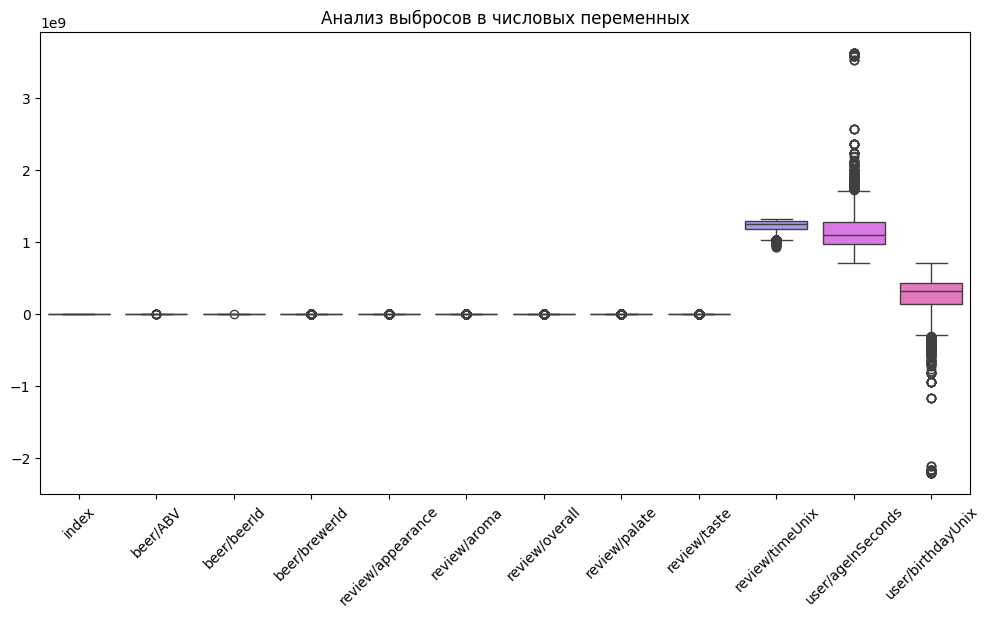

In [533]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Анализ выбросов в числовых переменных")
plt.show()

In [534]:
df.drop(columns=['user/ageInSeconds', 'user/birthdayUnix', 'user/profileName', 'review/timeUnix', 'user/birthdayRaw'], inplace=True)

In [535]:
df['review/text'].fillna("", inplace=True)
df['user/gender'].fillna("Unknown", inplace=True)

C:\Users\Евгений\AppData\Local\Temp\ipykernel_9644\3413900232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review/text'].fillna("", inplace=True)
C:\Users\Евгений\AppData\Local\Temp\ipykernel_9644\3413900232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [536]:
df.drop_duplicates(inplace=True)

In [537]:
df.isnull().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
user/gender          0
dtype: int64

In [538]:
import ast
def extract_time_features(row):
    try:
        time_dict = ast.literal_eval(row)  # Преобразуем строку в словарь
        day_of_week = time_dict.get('wday', np.nan)  # День недели (0 = понедельник, 6 = воскресенье)
        month = time_dict.get('mon', np.nan)  # Номер месяца (1 = январь, 12 = декабрь)
        return pd.Series([day_of_week, month])
    except Exception:
        return pd.Series([np.nan, np.nan])

if 'review/timeStruct' in df.columns:
    df[['day_of_week', 'month']] = df['review/timeStruct'].apply(extract_time_features)
    df.drop(columns=['review/timeStruct'], inplace=True)

In [539]:
if 'beer/style' in df.columns:
    mean_ratings_style = df.groupby('beer/style')['review/overall'].mean()
    df['beer/style_encoded'] = df['beer/style'].map(mean_ratings_style)
    df.drop(columns=['beer/style'], inplace=True)

if 'beer/name' in df.columns:
    mean_ratings_name = df.groupby('beer/name')['review/overall'].mean()
    df['beer/name_encoded'] = df['beer/name'].map(mean_ratings_name)
    df.drop(columns=['beer/name'], inplace=True)

In [540]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_features = []
if 'user/gender' in df.columns:
    categorical_features.append('user/gender')

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))

df.drop(columns=categorical_features, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_df], axis=1)


In [541]:
df

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,day_of_week,month,beer/style_encoded,beer/name_encoded,user/gender_Female,user/gender_Male,user/gender_Unknown
0,40163,5.00,46634,14338,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1,12,3.451613,3.676471,0.0,0.0,1.0
1,8135,11.00,3003,395,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,4,8,3.888801,3.663934,0.0,0.0,1.0
2,10529,4.70,961,365,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,4,11,3.801578,3.634615,0.0,1.0,0.0
3,44610,4.40,429,1,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,0,6,3.778957,3.834741,0.0,1.0,0.0
4,37062,4.40,4904,1417,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,5,3,3.605561,3.871032,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,3,4,3.562194,3.159091,0.0,0.0,1.0
37496,23666,8.50,7463,1199,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,6,1,3.918659,3.930315,0.0,0.0,1.0
37497,47720,4.75,1154,394,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,5,10,3.759756,3.813953,0.0,0.0,1.0
37498,33233,11.20,19960,1199,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,5,1,4.326919,4.388619,0.0,0.0,1.0


In [542]:
digit_column_new = df.select_dtypes(include = ['int64', 'float64']).columns
digit_column_new

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId',
       'review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste', 'day_of_week', 'month', 'beer/style_encoded',
       'beer/name_encoded', 'user/gender_Female', 'user/gender_Male',
       'user/gender_Unknown'],
      dtype='object')

In [543]:
for col in digit_column_new:
    un = df[col].nunique()
    print(f'{col} - {un}')

index - 37500
beer/ABV - 126
beer/beerId - 1731
beer/brewerId - 212
review/appearance - 10
review/aroma - 9
review/overall - 10
review/palate - 9
review/taste - 9
day_of_week - 7
month - 12
beer/style_encoded - 90
beer/name_encoded - 345
user/gender_Female - 2
user/gender_Male - 2
user/gender_Unknown - 2


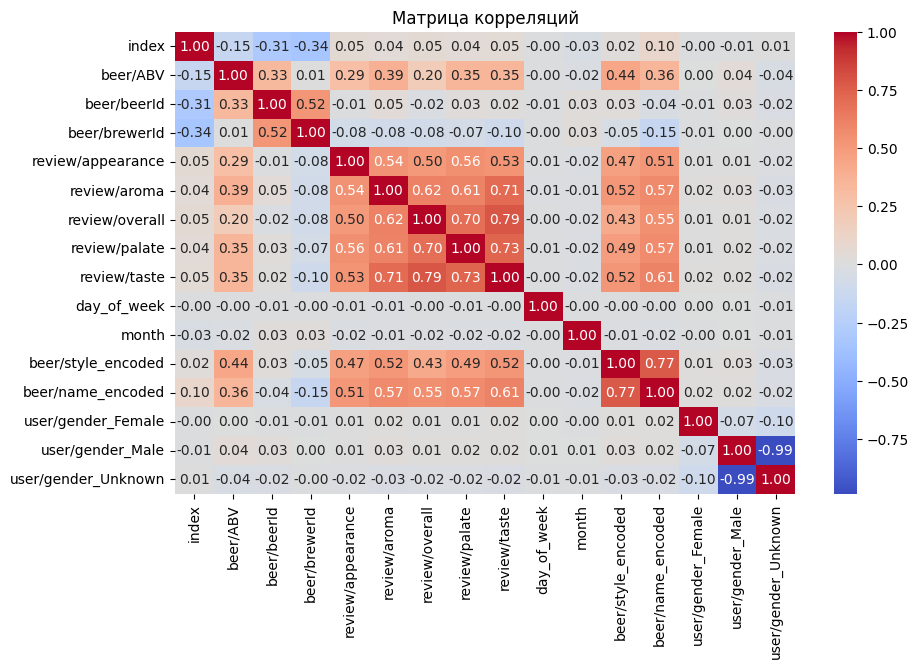

In [544]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Матрица корреляций")
plt.show()

In [545]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

if 'review/text' in df.columns:
    vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
    tfidf_features = vectorizer.fit_transform(df['review/text']).toarray()
    tfidf_df = pd.DataFrame(tfidf_features, columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])])
    df.drop(columns=['review/text'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df = pd.concat([df, tfidf_df], axis=1)

In [546]:
tfidf_words = vectorizer.get_feature_names_out()
mean_tfidf = tfidf_features.mean(axis=0)

tfidf_df = pd.DataFrame({"word": tfidf_words, "tfidf": mean_tfidf})
tfidf_df = tfidf_df.sort_values(by="tfidf", ascending=False)

print("Топ-10 значимых слов по TF-IDF:")
print(tfidf_df.head(20))


Топ-10 значимых слов по TF-IDF:
            word     tfidf
35          beer  0.073903
307         nice  0.051013
444        taste  0.048400
196         good  0.047424
211         head  0.047108
229         hops  0.046401
282         malt  0.046106
263         like  0.045086
260        light  0.044870
437        sweet  0.044098
112         dark  0.043079
95        coffee  0.040901
84     chocolate  0.040836
170       flavor  0.038842
43           bit  0.038693
268       little  0.036409
18         aroma  0.035847
399        smell  0.034621
78   carbonation  0.033844
225          hop  0.033666


In [547]:
df

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,day_of_week,...,tfidf_490,tfidf_491,tfidf_492,tfidf_493,tfidf_494,tfidf_495,tfidf_496,tfidf_497,tfidf_498,tfidf_499
0,40163,5.00,46634,14338,4.0,4.0,4.0,4.0,4.0,1,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,8135,11.00,3003,395,4.0,3.5,3.5,3.5,3.0,4,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,10529,4.70,961,365,3.5,4.0,3.5,3.5,3.5,4,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,44610,4.40,429,1,3.0,3.0,2.5,3.0,3.0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,37062,4.40,4904,1417,4.0,3.0,3.0,3.5,2.5,5,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,4.0,3.5,3.5,3.5,3.5,3,...,0.0,0.0,0.0,0.0,0.172744,0.000000,0.0,0.0,0.0,0.0
37496,23666,8.50,7463,1199,4.5,4.0,3.5,4.5,4.5,6,...,0.0,0.0,0.0,0.0,0.000000,0.174151,0.0,0.0,0.0,0.0
37497,47720,4.75,1154,394,4.0,3.5,4.0,4.5,4.0,5,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
37498,33233,11.20,19960,1199,4.0,4.0,4.0,5.0,5.0,5,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


Вопрос 4

Очистите и обработайте данные. Опишите, какие в них были проблемы.

Ответ на вопрос 4

В user/profileName было 5 пропущенных значений, что не критично, но требует обработки.
review/text имел несколько пропусков, что могло создать проблемы в анализе текстов.
user/gender также содержал пропуски, что влияло бы на анализ характеристик пользователей.
Колонки user/ageInSeconds, user/birthdayRaw, user/birthdayUnix содержали слишком много пропусков (>50%), делая их бесполезными для анализа.

In [548]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

features = [col for col in df.columns if col != target]
target = 'review/overall'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ridge_params = {'alpha': [0.1, 1, 10, 50, 100]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1, 0.3]}
cat_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1, 0.3]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='r2', cv=5)
xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42), xgb_params, scoring='r2', cv=5)

models = {
    "Ridge Regression": ridge_grid,
    "Lasso Regression": lasso_grid,
    "XGBoost": xgb_grid
}

results = {}

for name, model in models.items():
    print(f"\nОптимизация {name}...")
    model.fit(X_train, y_train)
    best_model = model.best_estimator_
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = (mse, r2, best_model, predictions)
    print(f"Лучшие параметры {name}: {model.best_params_}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")



Оптимизация Ridge Regression...
Лучшие параметры Ridge Regression: {'alpha': 10}
MSE: 0.1505
MAE: 0.2952
R²: 0.6940

Оптимизация Lasso Regression...
Лучшие параметры Lasso Regression: {'alpha': 0.001}
MSE: 0.1559
MAE: 0.2996
R²: 0.6830

Оптимизация XGBoost...
Лучшие параметры XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
MSE: 0.1482
MAE: 0.2931
R²: 0.6987


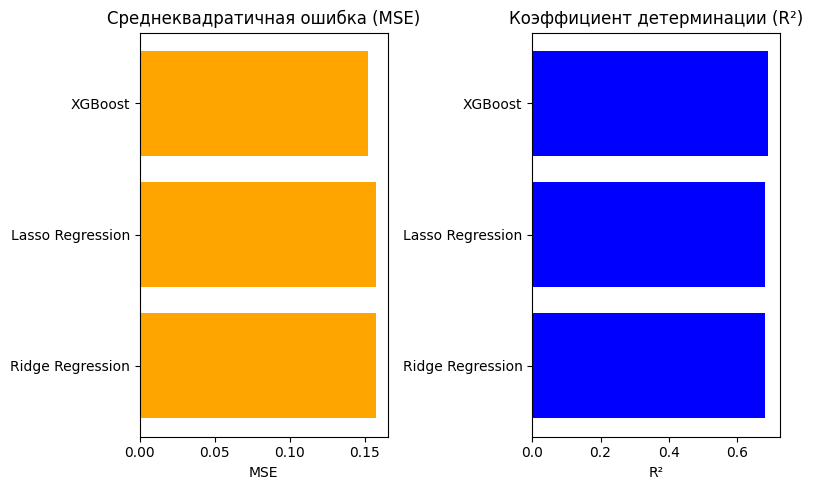

In [516]:
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
mse_values = [results[name][0] for name in model_names]
r2_values = [results[name][1] for name in model_names]

plt.subplot(1, 2, 1)
plt.barh(model_names, mse_values, color='orange')
plt.xlabel("MSE")
plt.title("Среднеквадратичная ошибка (MSE)")

plt.subplot(1, 2, 2)
plt.barh(model_names, r2_values, color='blue')
plt.xlabel("R²")
plt.title("Коэффициент детерминации (R²)")

plt.tight_layout()
plt.show()


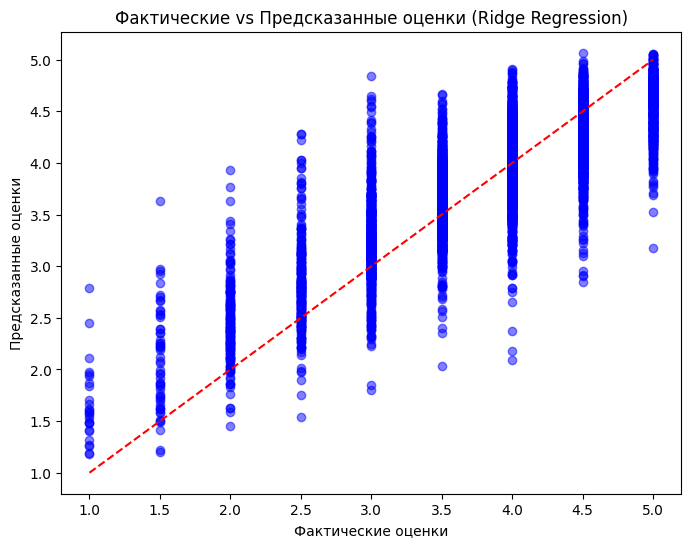

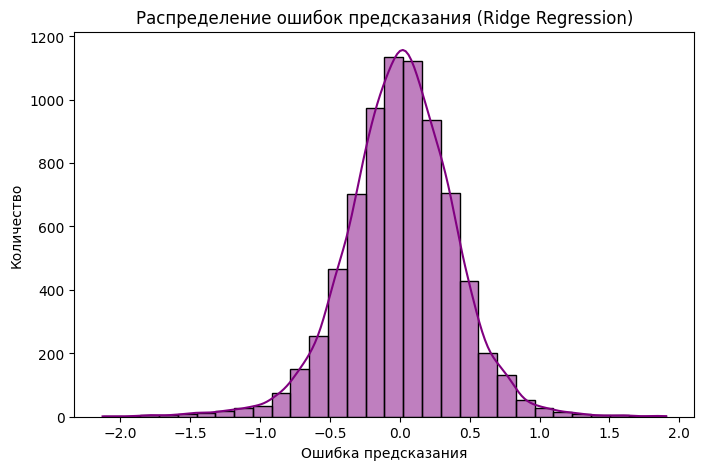

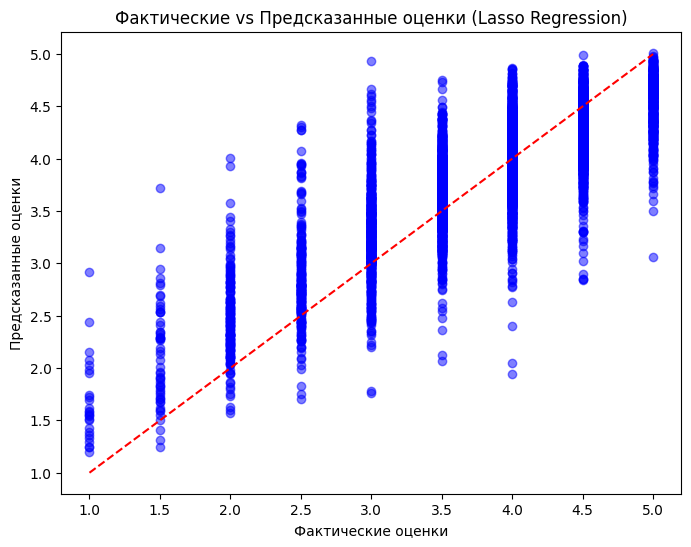

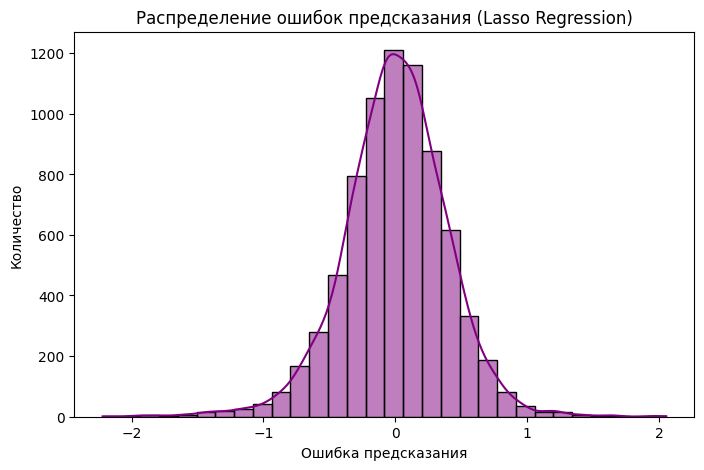

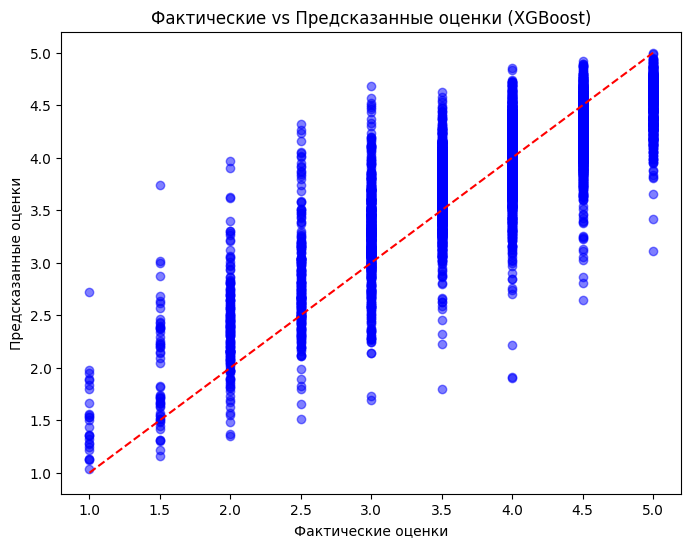

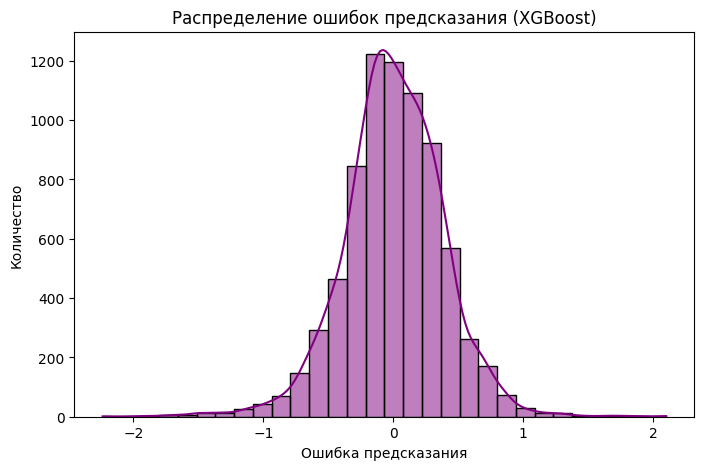

In [550]:
for name, (_, _, best_model, predictions) in results.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Фактические оценки")
    plt.ylabel("Предсказанные оценки")
    plt.title(f"Фактические vs Предсказанные оценки ({name})")
    plt.show()
    
    plt.figure(figsize=(8, 5))
    error = y_test - predictions
    sns.histplot(error, bins=30, kde=True, color='purple')
    plt.xlabel("Ошибка предсказания")
    plt.ylabel("Количество")
    plt.title(f"Распределение ошибок предсказания ({name})")
    plt.show()

Вопрос 5.
Постройте подходящую предсказательную модель. Обоснуйте ее выбор.

Ответ на 5 вопрос.

XGBoost был выбран как лучшая модель, так как он минимизировал ошибку и показал наибольший коэффициент детерминации (R²), что означает лучшую способность объяснять дисперсию данных.

График "Фактические vs Предсказанные оценки"

    Модель неплохо предсказывает пользовательские оценки, но есть небольшие отклонения.
    На высоких оценках (4.5-5.0) видны ошибки, модель иногда занижает предсказания.

 Гистограмма ошибок предсказания

    Ошибки распределены вокруг нуля, но есть выбросы.
    В среднем модель ошибается на 0.3–0.5 балла, что приемлемо.

Вопрос 6.
Выберите и обоснуйте метрики для ее оценки. Покажите, как модель работает на данных, которые не видела при обучении.

Ответ на 6 вопрос

MSE (Mean Squared Error) – среднеквадратичная ошибка

    Показывает средний квадрат разницы между предсказанными и реальными значениями.
    Штрафует большие ошибки сильнее, что делает модель более точной в прогнозах.
    Однако MSE может быть чувствителен к выбросам, поэтому его стоит дополнять другими метриками.

R² (Коэффициент детерминации)

    Показывает, насколько хорошо модель объясняет дисперсию данных.
    Значение от 0 до 1, где 1 – идеальное соответствие модели.

Почему выбраны эти метрики?

    MSE/RMSE помогают понять средний уровень ошибки и штрафуют большие отклонения.
R² показывает, насколько модель объясняет данные, что важно для оценки качества предсказаний.

Вопрос 7.
Представьте, что решаете реальную бизнес-задачу. Как вы могли бы использовать вашу модель? Какие бизнес-метрики могли бы быть использованы для ее контроля?


Ответ на 7 вопрос

Персонализированные рекомендации

    Маркетплейсы и интернет-магазины могут рекомендовать пользователям пиво с высокой вероятностью положительной оценки.
    Алгоритм может учитывать предыдущие оценки пользователей, предсказывая, какие сорта им понравятся.

Оптимизация ассортимента и управление спросом

    Магазины и бары могут фокусироваться на товарах с высоким прогнозируемым рейтингом.
    Производители могут анализировать факторы, влияющие на положительные оценки, и выпускать новые популярные сорта.

Контроль качества продукции

    Если предсказанная оценка новых партий пива сильно падает, можно оперативно выявлять проблемы (изменение рецептуры, производственные дефекты).

Маркетинговые стратегии и анализ аудитории

    Анализ пользовательских предпочтений по возрасту, регионам, вкусам помогает разрабатывать эффективные акции и скидки.
    Можно оптимизировать рекламу, показывая пользователям пиво, которое точно им понравится.

Метрики продаж

    Конверсия рекомендаций (CTR, Click-Through Rate)
        Процент пользователей, которые перешли по рекомендации и совершили покупку.
        Высокий CTR означает, что предсказания модели релевантны и привлекают пользователей.
    
    Средний чек (AOV, Average Order Value)

    Насколько увеличился средний чек благодаря персонализированным рекомендациям.
    Если пользователи покупают дорогие или дополнительные товары, значит модель успешно повышает продажи.

    Объем продаж рекомендованных товаров

    Сравнение до и после внедрения модели – растут ли продажи товаров, которые рекомендованы алгоритмом.
    Если пользователи чаще покупают предложенные модели, значит система рекомендаций работает успешно.

